In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
### Đọc dữ liệu
# Yêu cầu tải file data,csv về thư mục project
data = pd.read_csv("data.csv", keep_default_na=False)

# Hiển thị tên các cột
columns_list = [[index + 1, column] for index, column in enumerate(data.columns.tolist())]
print("Danh sách các cột trong dữ liệu:")
print(tabulate(columns_list, headers=["STT", "Tên cột"], tablefmt="pretty"))
print()

print("Thông tin thống kê dữ liệu:")
print(data.info())
print("\nThống kê mô tả:")
print(data.describe())
print()

# Xử lý dữ liệu lỗi
print("Kiểm tra giá trị thiếu:")
print(data.isnull().sum())
data = data.dropna()
# Kiểm tra kiểu dữ liệu
print("\nKiểu dữ liệu của từng cột:")
print(data.dtypes)
# Kiểm tra các giá trị bất thường (ví dụ cột tuổi)
print("\nKiểm tra giá trị bất thường (ví dụ cột tuổi):")
print(data[data["age"] < 0])

# Onehot coding các cột phân loại
categorical_cols = [
    "gender",
    "region",
    "income_level",
    "smoking_status",
    "alcohol_consumption",
    "dietary_habits",
    "physical_activity",
    "air_pollution_exposure",
    "stress_level",
    "EKG_results",
]

data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Tách đặc trưng và nhãn
X = data_encoded.drop("heart_attack", axis=1)
y = data_encoded["heart_attack"]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nDữ liệu sau khi chuẩn hóa (5 dòng đầu):")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Danh sách các cột trong dữ liệu:
+-----+--------------------------------+
| STT |            Tên cột             |
+-----+--------------------------------+
|  1  |              age               |
|  2  |             gender             |
|  3  |             region             |
|  4  |          income_level          |
|  5  |          hypertension          |
|  6  |            diabetes            |
|  7  |       cholesterol_level        |
|  8  |            obesity             |
|  9  |      waist_circumference       |
| 10  |         family_history         |
| 11  |         smoking_status         |
| 12  |      alcohol_consumption       |
| 13  |       physical_activity        |
| 14  |         dietary_habits         |
| 15  |     air_pollution_exposure     |
| 16  |          stress_level          |
| 17  |          sleep_hours           |
| 18  |    blood_pressure_systolic     |
| 19  |    blood_pressure_diastolic    |
| 20  |      fasting_blood_sugar       |
| 21  |        cholester


Thống kê tổng quát:
→ Tổng số mẫu: 300
→ Số trường đặc trưng (feature): 43
→ Trung bình tổng thể (sau chuẩn hóa): 0.0000
→ Độ lệch chuẩn tổng thể (sau chuẩn hóa): 1.0000

Thống kê các thành phần PCA:
                PC1           PC2           PC3           PC4           PC5  \
count  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02  3.000000e+02   
mean  -1.776357e-17 -9.473903e-17 -5.921189e-18 -3.552714e-17  3.552714e-17   
std    1.620738e+00  1.553604e+00  1.544705e+00  1.494052e+00  1.440335e+00   
min   -3.913948e+00 -3.772827e+00 -4.327810e+00 -3.726064e+00 -3.601007e+00   
25%   -1.142854e+00 -1.122230e+00 -1.015823e+00 -1.081492e+00 -9.008877e-01   
50%   -1.805091e-02 -6.323288e-02  7.105848e-02  4.887350e-02  3.759932e-02   
75%    1.184455e+00  1.105920e+00  1.163139e+00  1.033669e+00  9.374221e-01   
max    3.907223e+00  4.541961e+00  3.713522e+00  3.866921e+00  4.115291e+00   

                PC6           PC7           PC8           PC9          PC10  \
count  3

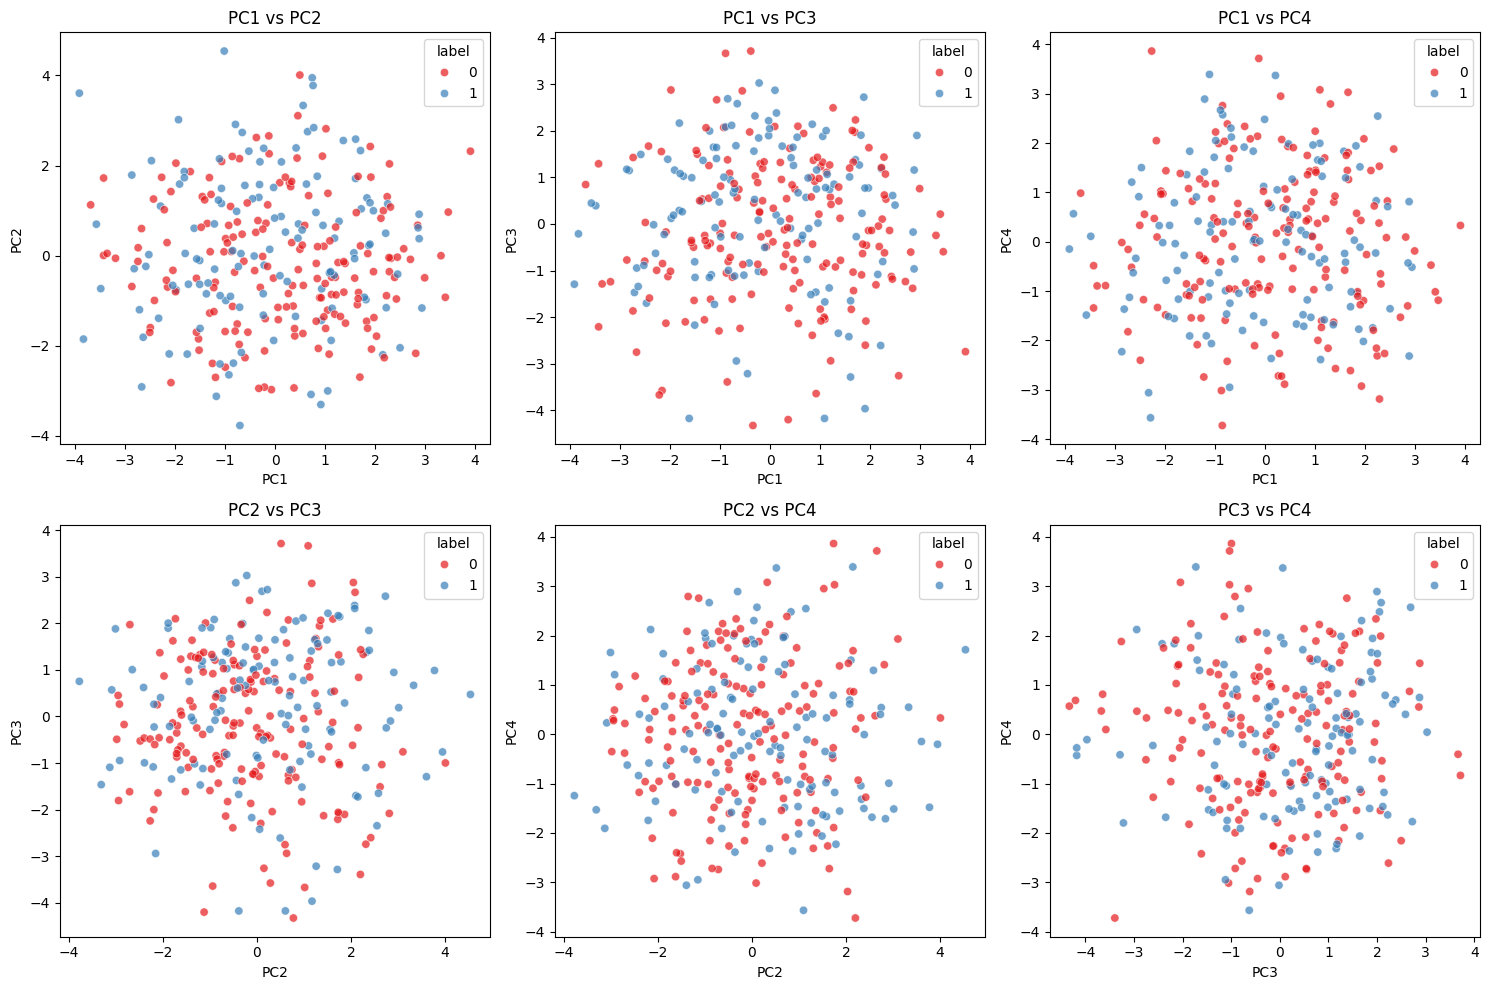


Phương sai giải thích từng thành phần PCA:
PC 1: 0.0609
PC 2: 0.0559
PC 3: 0.0553
PC 4: 0.0517
PC 5: 0.0481
PC 6: 0.0475
Tổng phương sai giải thích PCA: 0.9610 (ví dụ 0.95 tương ứng 95%)


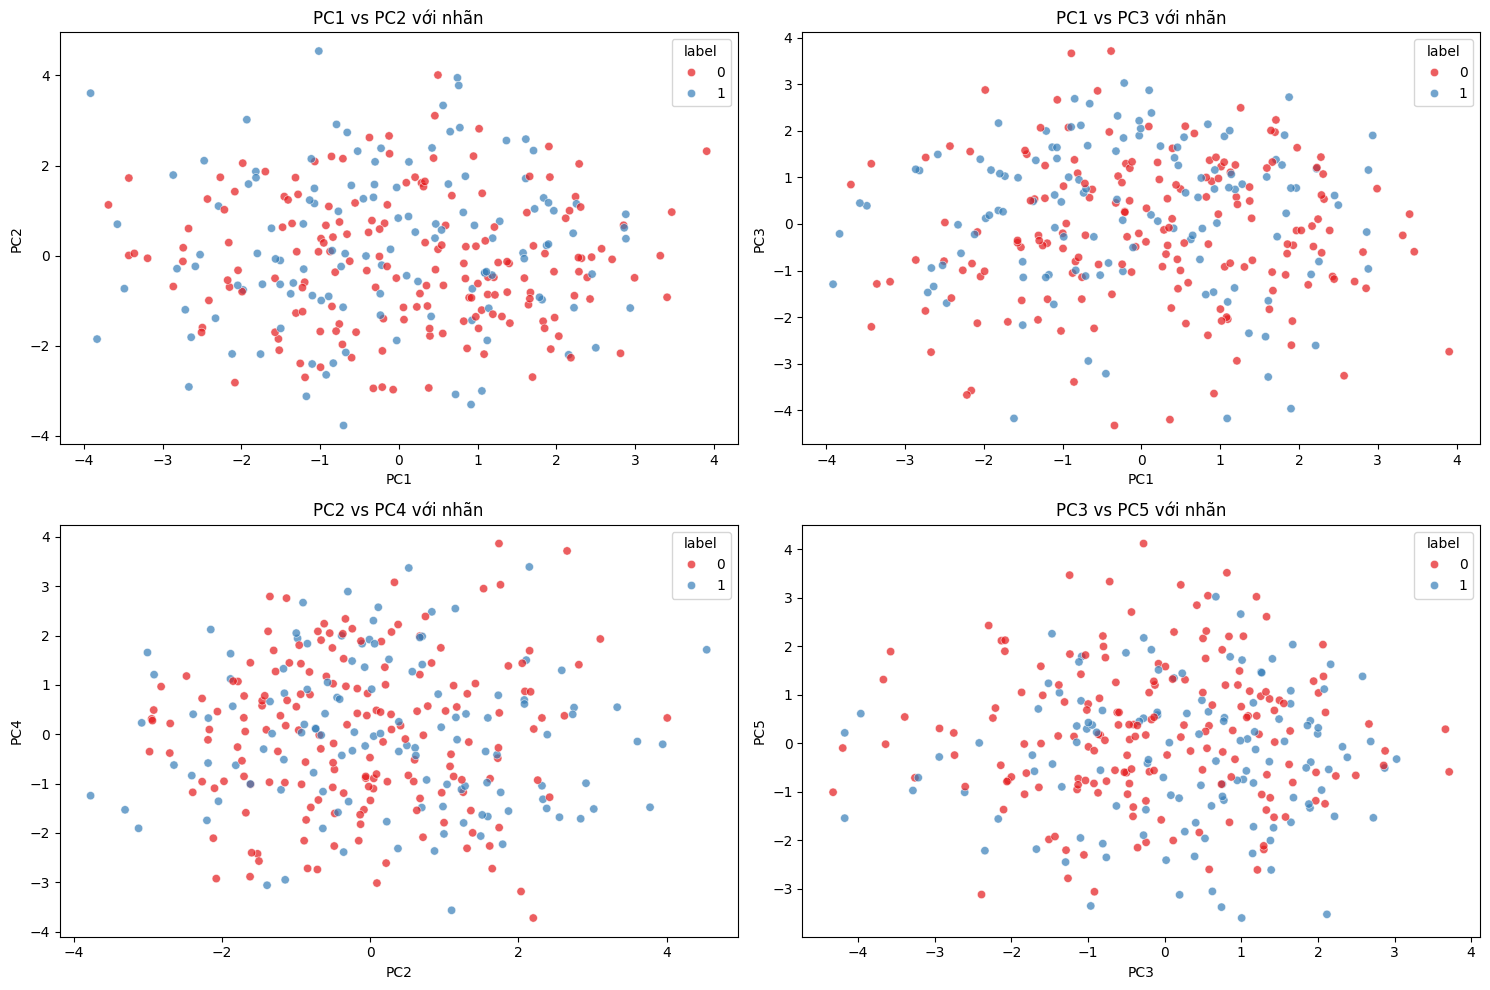


Thống kê thành phần chính từ LDA:
                LD1
count  3.000000e+02
mean  -5.980401e-16
std    1.234660e+00
min   -3.191687e+00
25%   -9.516308e-01
50%   -8.373391e-02
75%    7.035801e-01
max    3.480741e+00

Phương sai giải thích từng thành phần LDA:
Thành phần 1: 1.0000
Tổng phương sai giải thích LDA: 1.0000


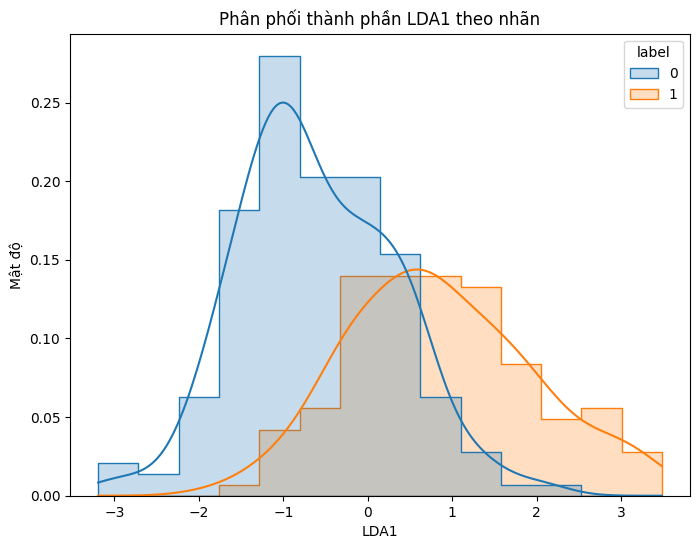


So sánh PCA vs LDA:


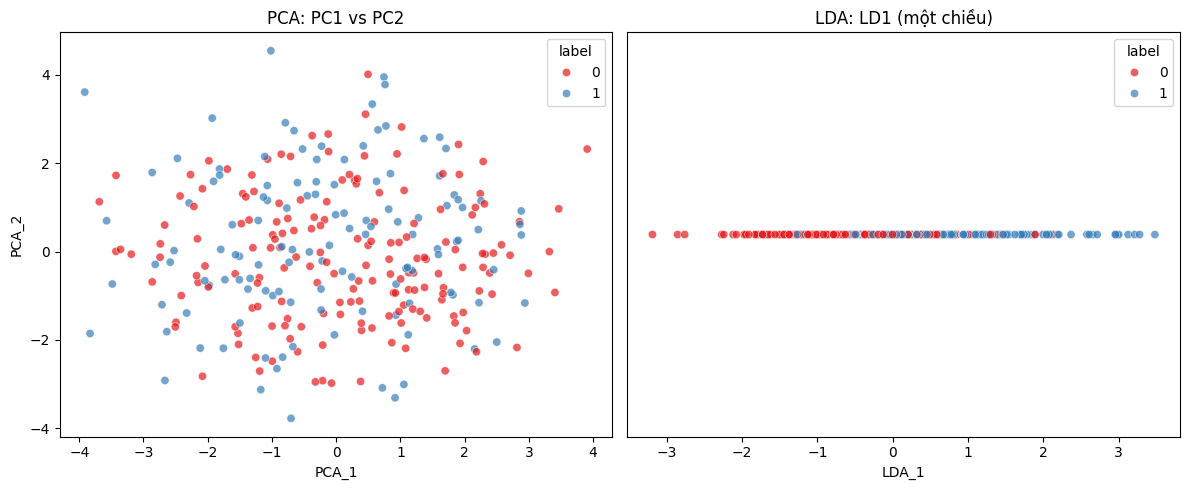

In [27]:
### Phân tích các tham số thống kê của dữ liệu
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nThống kê tổng quát:")
print(f"→ Tổng số mẫu: {X.shape[0]}")
print(f"→ Số trường đặc trưng (feature): {X.shape[1]}")
print(f"→ Trung bình tổng thể (sau chuẩn hóa): {X_scaled_df.values.mean():.4f}")
print(f"→ Độ lệch chuẩn tổng thể (sau chuẩn hóa): {X_scaled_df.values.std():.4f}")

### Phương pháp PCA

pca = PCA(n_components=0.95) # Tự động chọn số chiều giữ lại 95% phương sai
X_reduced_PCA = pca.fit_transform(X_scaled)

# Đánh giá các thành phần chính sau PCA
X_pca_df = pd.DataFrame(X_reduced_PCA, columns=[f'PC{i+1}' for i in range(X_reduced_PCA.shape[1])])
print("\nThống kê các thành phần PCA:")
print(X_pca_df.describe())

# PCA với 6 thành phần chính
pca_vis = PCA(n_components=6)
X_pca_vis = pca_vis.fit_transform(X_scaled)

# Tạo DataFrame để tiện trực quan
pca_df = pd.DataFrame(X_pca_vis, columns=[f"PC{i+1}" for i in range(6)])
pca_df['label'] = y

# Hiển thị 6 biểu đồ scatter cho 6 cặp thành phần chính đầu tiên
pair_indices = [(0,1), (0,2), (0,3), (1,2), (1,3), (2,3)]
plt.figure(figsize=(15, 10))
for idx, (i, j) in enumerate(pair_indices):
    plt.subplot(2, 3, idx+1)
    sns.scatterplot(data=pca_df, x=f'PC{i+1}', y=f'PC{j+1}', hue='label', palette='Set1', alpha=0.7)
    plt.title(f'PC{i+1} vs PC{j+1}')
    plt.xlabel(f'PC{i+1}')
    plt.ylabel(f'PC{j+1}')
plt.tight_layout()
plt.show()

# Phương sai giải thích của từng thành phần
print("\nPhương sai giải thích từng thành phần PCA:")
for i, var_ratio in enumerate(pca_vis.explained_variance_ratio_):
    print(f"PC {i+1}: {var_ratio:.4f}")

# Tổng phương sai giải thích (lượng thông tin được giữ lại)
total_explained_variance_pca = pca.explained_variance_ratio_.sum()
print(f"Tổng phương sai giải thích PCA: {total_explained_variance_pca:.4f} (ví dụ 0.95 tương ứng 95%)")

# Scatter plot
pair_indices = [(0,1), (0,2), (1,3), (2,4)]  # ví dụ chọn 4 cặp PC để xem
plt.figure(figsize=(15, 10))
for idx, (i, j) in enumerate(pair_indices):
    plt.subplot(2, 2, idx+1)
    sns.scatterplot(data=pca_df, x=f'PC{i+1}', y=f'PC{j+1}', hue='label', palette='Set1', alpha=0.7)
    plt.title(f'PC{i+1} vs PC{j+1} với nhãn')
plt.tight_layout()
plt.show()

### Phương pháp LDA

lda = LDA(n_components=1)  # Vì có 2 lớp => tối đa là 1
X_reduced_LDA = lda.fit_transform(X_scaled, y)

# Đánh giá các thành phần chính sau LDA
X_lda_df = pd.DataFrame(X_reduced_LDA, columns=["LD1"])
print("\nThống kê thành phần chính từ LDA:")
print(X_lda_df.describe())

# Phương sai giải thích của từng thành phần
print("\nPhương sai giải thích từng thành phần LDA:")
for i, var_ratio in enumerate(lda.explained_variance_ratio_):
    print(f"Thành phần {i+1}: {var_ratio:.4f}")

# Tổng phương sai giải thích (lượng thông tin được giữ lại)
total_explained_variance_lda = lda.explained_variance_ratio_.sum()
print(f"Tổng phương sai giải thích LDA: {total_explained_variance_lda:.4f}")

# Tạo DataFrame chứa kết quả LDA và nhãn
lda_df = pd.DataFrame(X_reduced_LDA, columns=['LDA1'])
lda_df['label'] = y

# Histogram so sánh phân phối LDA1 theo nhãn
plt.figure(figsize=(8,6))
sns.histplot(data=lda_df, x='LDA1', hue='label', kde=True, element='step', stat='density')
plt.title('Phân phối thành phần LDA1 theo nhãn')
plt.xlabel('LDA1')
plt.ylabel('Mật độ')
plt.show()


# Tạo DataFrame để so sánh PCA vs LDA
print("\nSo sánh PCA vs LDA:")
df_compare = pd.DataFrame({
    'PCA_1': X_reduced_PCA[:, 0],
    'PCA_2': X_reduced_PCA[:, 1] if X_reduced_PCA.shape[1] > 1 else np.zeros_like(X_reduced_PCA[:, 0]),
    'LDA_1': X_reduced_LDA[:, 0],
    'label': y
})

# Scatter plot PCA (PC1 vs PC2)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df_compare, x='PCA_1', y='PCA_2', hue='label', palette='Set1', alpha=0.7)
plt.title('PCA: PC1 vs PC2')

# Scatter plot LDA (LD1)
plt.subplot(1,2,2)
sns.scatterplot(data=df_compare, x='LDA_1', y=np.zeros_like(df_compare['LDA_1']), hue='label', palette='Set1', alpha=0.7)
plt.title('LDA: LD1 (một chiều)')
plt.yticks([])  # Ẩn trục y vì chỉ 1 chiều
plt.tight_layout()
plt.show()

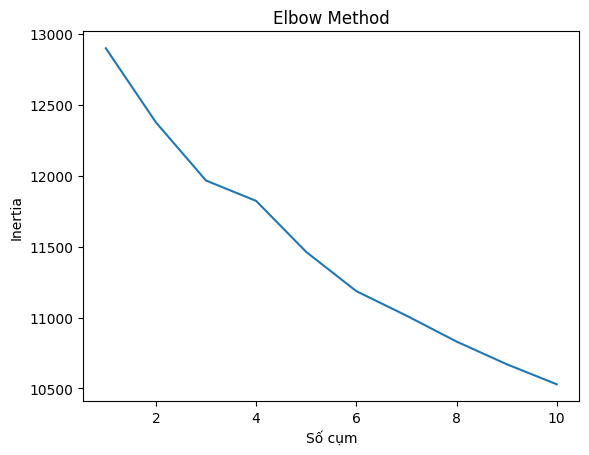

Thuật toán KMeans hội tụ sau 19 lần cập nhật.
Thuật toán GMM hội tụ sau 31 lần lặp.

--- Thống kê các đặc trưng đầu vào theo cụm KMeans ---
            feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
Cụm_KMeans                                                                     
0           -0.180619  -0.126026   0.014040   0.191183  -0.123120  -0.089545   
1            0.050028   0.203838  -0.046415  -0.137685  -0.006174  -0.023152   
2            0.100203  -0.085194   0.031258  -0.028264   0.105285   0.093708   

            feature_6  feature_7  feature_8  feature_9  ...  feature_35  \
Cụm_KMeans                                              ...               
0           -0.056632   0.074156   0.039589   0.089538  ...   -0.010915   
1           -0.028005  -0.108538  -0.018971  -0.309490  ...    0.125358   
2            0.071534   0.039659  -0.014613   0.211724  ...   -0.106270   

            feature_36  feature_37  feature_38  feature_39  feature_40  \
Cụm_KMean

In [28]:
# Phương pháp Elbow để xác định số cụm tối ưu
inertia = []
for k in range(1, 11):  # từ 1 đến 10 cụm
    kmeans = KMeans(n_clusters=k, random_state=42)  # Đảm bảo tính lặp lại kết quả
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 11), inertia)
plt.xlabel('Số cụm')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Chọn số cụm tối ưu dựa trên kết quả Elbow
optimal_k = 3

### Thực hiện phân cụm với số cụm tối ưu
# K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
print(f"Thuật toán KMeans hội tụ sau {kmeans.n_iter_} lần cập nhật.")

# GMM
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
print(f"Thuật toán GMM hội tụ sau {gmm.n_iter_} lần lặp.")

# Tạo DataFrame chứa dữ liệu đầu vào, nhãn cụm và đầu ra
df = pd.DataFrame(X_scaled, columns=[f'feature_{i}' for i in range(X_scaled.shape[1])])
df['Cụm_KMeans'] = kmeans_labels
df['Cụm_GMM'] = gmm_labels
df['Đầu_ra'] = y  # giả sử y có cùng số mẫu với X

# Nhận xét định lượng với KMeans
print("\n--- Thống kê các đặc trưng đầu vào theo cụm KMeans ---")
print(df.groupby('Cụm_KMeans').mean(numeric_only=True))

print("\n--- Thống kê biến đầu ra theo cụm KMeans ---")
print(df.groupby('Cụm_KMeans')['Đầu_ra'].describe())

# Nhận xét định lượng với GMM
print("\n--- Thống kê các đặc trưng đầu vào theo cụm GMM ---")
print(df.groupby('Cụm_GMM').mean(numeric_only=True))

print("\n--- Thống kê biến đầu ra theo cụm GMM ---")
print(df.groupby('Cụm_GMM')['Đầu_ra'].describe())


Bắt đầu mô hình LinearSVC...

=== Kết quả trên DỮ LIỆU: Gốc ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        28         |      5      |
|    Thực tế: Bị    |        12         |     15      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.70        │ 0.85     │       0.77 │        33 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.75        │ 0.56     │       0.64 │        27 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │         

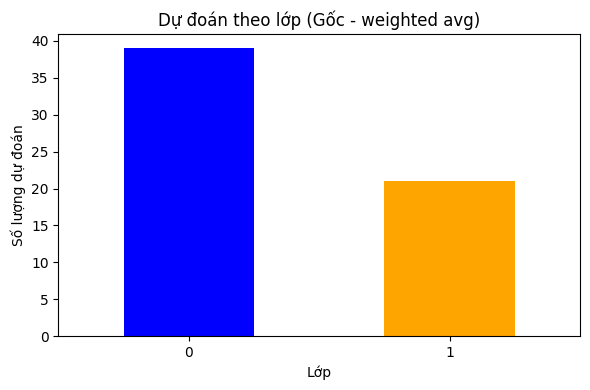


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        42         |     11      |
|    Thực tế: Bị    |        15         |     22      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.74        │ 0.79     │       0.76 │        53 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.67        │ 0.59     │       0.63 │        37 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.71 │        90 │
├──────────────┼─────────────┼────────

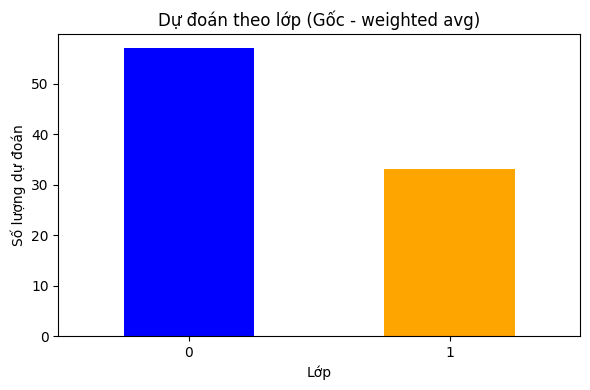


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        60         |     14      |
|    Thực tế: Bị    |        20         |     26      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.75        │ 0.81     │       0.78 │        74 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.65        │ 0.57     │       0.6  │        46 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.72 │       120 │
├──────────────┼─────────────┼────────

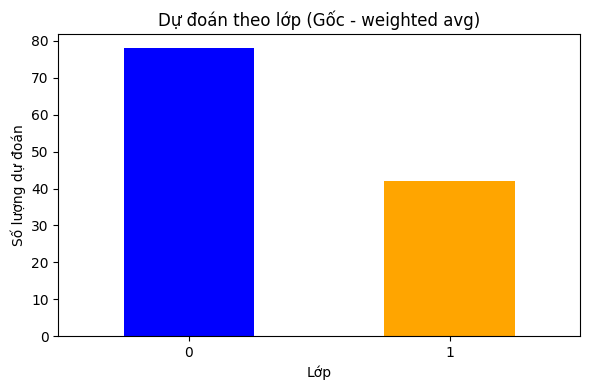


=== Kết quả trên DỮ LIỆU: Giảm chiều PCA ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        27         |      6      |
|    Thực tế: Bị    |        12         |     15      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.69        │ 0.82     │       0.75 │        33 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.71        │ 0.56     │       0.62 │        27 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.7  │    

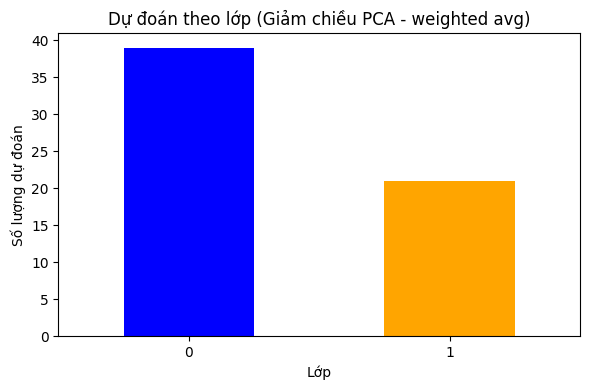


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        44         |      9      |
|    Thực tế: Bị    |        20         |     17      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.69        │ 0.83     │       0.75 │        53 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.65        │ 0.46     │       0.54 │        37 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.68 │        90 │
├──────────────┼─────────────┼────────

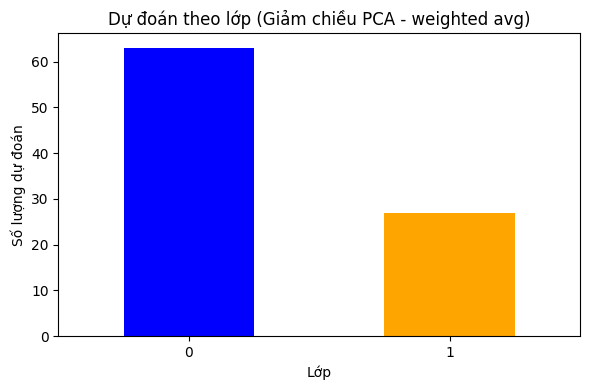


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        57         |     17      |
|    Thực tế: Bị    |        25         |     21      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.70        │ 0.77     │       0.73 │        74 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.55        │ 0.46     │       0.5  │        46 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.65 │       120 │
├──────────────┼─────────────┼────────

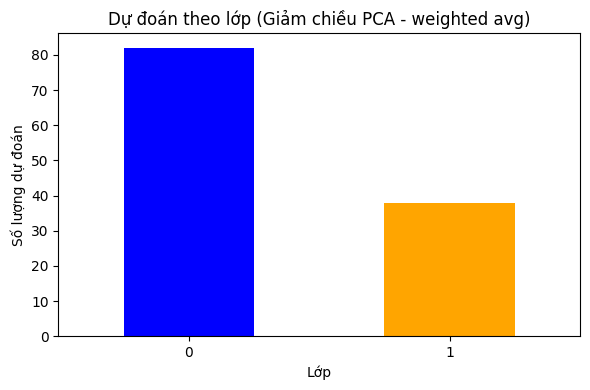


=== Kết quả trên DỮ LIỆU: Giảm chiều LDA ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        28         |      5      |
|    Thực tế: Bị    |         9         |     18      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.76        │ 0.85     │       0.8  │        33 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.78        │ 0.67     │       0.72 │        27 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.77 │    

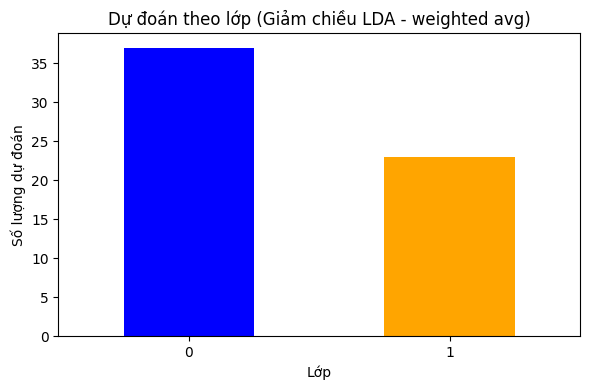


➡️  Tỉ lệ train:test = 7:3 (70:30)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        45         |      8      |
|    Thực tế: Bị    |        11         |     26      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.80        │ 0.85     │       0.83 │        53 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.76        │ 0.70     │       0.73 │        37 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.79 │        90 │
├──────────────┼─────────────┼────────

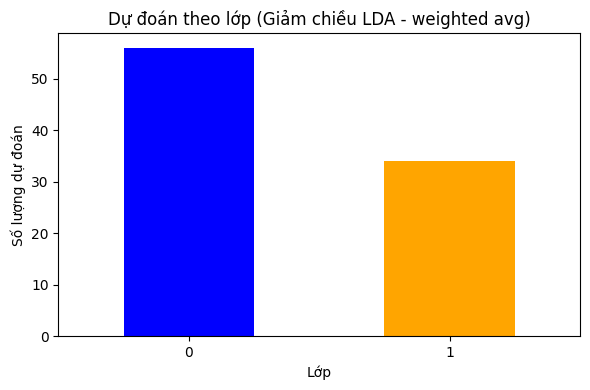


➡️  Tỉ lệ train:test = 6:4 (60:40)

Ma trận nhầm lẫn (Tập test):
+-------------------+-------------------+-------------+
|                   | Dự đoán: Không bị | Dự đoán: Bị |
+-------------------+-------------------+-------------+
| Thực tế: Không bị |        60         |     14      |
|    Thực tế: Bị    |        15         |     31      |
+-------------------+-------------------+-------------+

Kết quả trên tập test:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Label        │ Precision   │ Recall   │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0            │ 0.80        │ 0.81     │       0.81 │        74 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1            │ 0.69        │ 0.67     │       0.68 │        46 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │             │          │       0.76 │       120 │
├──────────────┼─────────────┼────────

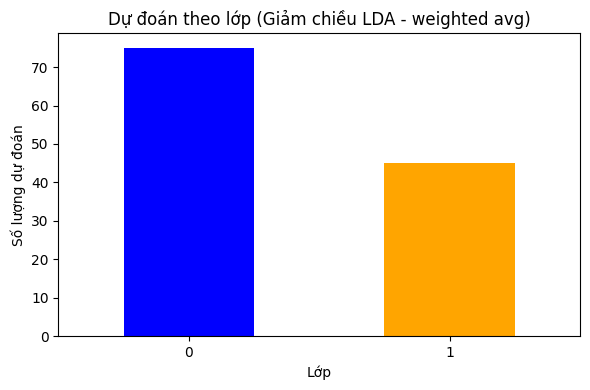


=====Kết thúc mô hình=====


In [29]:
# List tỷ lệ chia
ratios = [0.2, 0.3, 0.4]  # tương ứng: 4:1, 7:3, 6:4
ratio_labels = ['4:1 (80:20)', '7:3 (70:30)', '6:4 (60:40)']

# Dữ liệu cần thử (gốc và PCA)
datasets = {
    'Gốc': X_scaled,
    'Giảm chiều PCA': X_reduced_PCA,
    'Giảm chiều LDA': X_reduced_LDA
}
while True:
    method = input("\nChọn mô hình để chạy (1 = LinearSVC, 2 = Logistic Regression, 3 = KNN, 4 = Thoát): ")
    
    
    if method == '1':
        print("\nBắt đầu mô hình LinearSVC...")
    elif method == '2':
        print("\nBắt đầu mô hình Logistic Regression...")
    elif method == '3':
        print("\nBắt đầu mô hình KNN...")
    elif method == '4':
        break
    
    for data_label, X in datasets.items():
        print(f"\n=== Kết quả trên DỮ LIỆU: {data_label} ===\n")
        for ratio, label in zip(ratios, ratio_labels):
            print(f"\n➡️  Tỉ lệ train:test = {label}")
            
            # Chia dữ liệu
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=ratio, random_state=42
            )

            # Huấn luyện
            if method == '1':
                clf = LinearSVC(max_iter=10000)
            
            elif method == '2':
                clf = LogisticRegression(max_iter=1000, solver='lbfgs')
            
            else:
                clf = KNeighborsClassifier(n_neighbors=5)
                
            clf.fit(X_train, y_train)

            # Dự đoán
            y_pred = clf.predict(X_test)

            # Ma trận nhầm lẫn
            cm = confusion_matrix(y_test, y_pred)
            headers = ["", "Dự đoán: Không bị", "Dự đoán: Bị"]
            table = [
                ["Thực tế: Không bị", cm[0][0], cm[0][1]],
                ["Thực tế: Bị",        cm[1][0], cm[1][1]]
            ]
            print("\nMa trận nhầm lẫn (Tập test):")
            print(tabulate(table, headers=headers, tablefmt="pretty"))

            # Báo cáo phân loại
            report_dict = classification_report(y_test, y_pred, output_dict=True)
            table = []
            total_support = len(y_test)
            for label, metrics in report_dict.items():
                if isinstance(metrics, dict):
                    row = [label]
                    row += [f"{metrics[col]:.2f}" for col in ["precision", "recall", "f1-score", "support"]]
                    table.append(row)
                elif label == "accuracy":
                    table.append(["accuracy", "", "", f"{metrics:.2f}", f"{total_support}"])

            headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
            print("\nKết quả trên tập test:")
            print(tabulate(table, headers=headers, tablefmt="fancy_grid"))
            
            # Ma trận nhầm lẫn cho tập huấn luyện
            y_train_pred = clf.predict(X_train)
            cm_train = confusion_matrix(y_train, y_train_pred)
            headers = ["", "Dự đoán: Không bị", "Dự đoán: Bị"]
            table_train = [
                ["Thực tế: Không bị", cm_train[0][0], cm_train[0][1]],
                ["Thực tế: Bị",        cm_train[1][0], cm_train[1][1]]
            ]
            print("\nMa trận nhầm lẫn (Tập huấn luyện):")
            print(tabulate(table_train, headers=headers, tablefmt="pretty"))
        

            # Báo cáo phân loại cho tập huấn luyện
            train_report_dict = classification_report(y_train, y_train_pred, output_dict=True)
            train_table = []
            train_total_support = len(y_train)
            for label, metrics in train_report_dict.items():
                if isinstance(metrics, dict):
                    row = [label]
                    row += [f"{metrics[col]:.2f}" for col in ["precision", "recall", "f1-score", "support"]]
                    train_table.append(row)
                elif label == "accuracy":
                    train_table.append(["accuracy", "", "", f"{metrics:.2f}", f"{train_total_support}"])

            train_headers = ["Label", "Precision", "Recall", "F1-Score", "Support"]
            print("\nKết quả trên tập huấn luyện:")
            print(tabulate(train_table, headers=train_headers, tablefmt="fancy_grid"))
            
            # Đánh giá overfitting
            train_accuracy = accuracy_score(y_train, clf.predict(X_train))
            print(f"\nAccuracy trên tập huấn luyện: {train_accuracy:.4f}")
            print(f"Accuracy trên tập kiểm tra: {accuracy_score(y_test, y_pred):.4f}")
            if train_accuracy > accuracy_score(y_test, y_pred) + 0.031:
                print("Có dấu hiệu overfitting! Áp dụng điều chỉnh...")
                if method == '1':  # LinearSVC
                    clf = LinearSVC(C=0.1, max_iter=10000)
                elif method == '2':  # Logistic
                    clf = LogisticRegression(max_iter=1000, solver='lbfgs', penalty='l2', C=0.1)
                else:  # KNN
                    clf = KNeighborsClassifier(n_neighbors=7, weights='distance')
                
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                test_accuracy = accuracy_score(y_test, y_pred)
                print(f"✅ Accuracy sau khi hiệu chỉnh: {test_accuracy:.4f}")
            else: print("Không có dấu hiệu overfitting")

            # Biểu đồ số lượng dự đoán theo lớp
            class_counts = pd.Series(y_pred).value_counts()
            plt.figure(figsize=(6, 4))
            class_counts.plot(kind='bar', color=['blue', 'orange'])
            plt.title(f'Dự đoán theo lớp ({data_label} - {label})')
            plt.xlabel('Lớp')
            plt.ylabel('Số lượng dự đoán')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()        
    print("\n=====Kết thúc mô hình=====")

Số mẫu train: 180
Số mẫu test: 120
Hệ số tương quan giữa thực tế và dự đoán: 0.48680191715042015


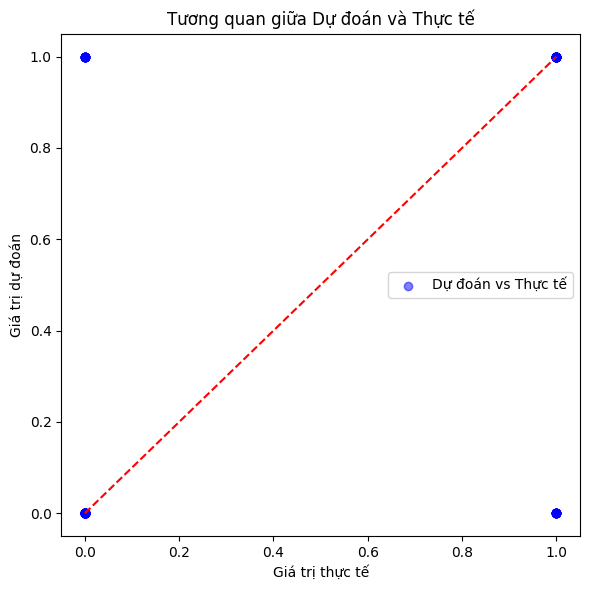

In [30]:
# Trực quan hóa tương quan giữa thực tế và dự đoán
print(f"Số mẫu train: {len(y_train)}")
print(f"Số mẫu test: {len(y_test)}")
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print(f'Hệ số tương quan giữa thực tế và dự đoán: {correlation}')
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Dự đoán vs Thực tế')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Đường chéo
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Tương quan giữa Dự đoán và Thực tế')
plt.legend()
plt.tight_layout()
plt.show()



===== CHUYỂN BÀI TOÁN PHÂN LOẠI → HỒI QUY (theo xác suất bị bệnh) =====

=== Kết quả trên DỮ LIỆU: Gốc ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0063
✅ R² Score: 0.9298


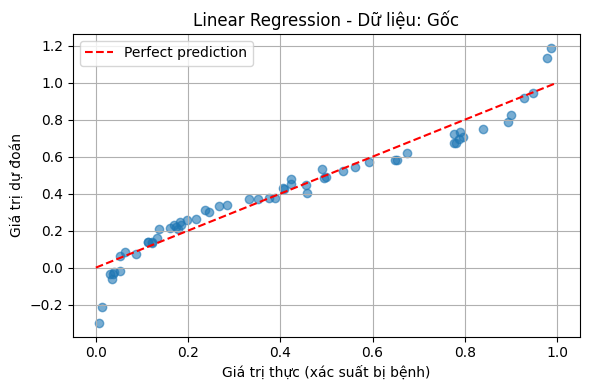


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0062
✅ R² Score: 0.9305


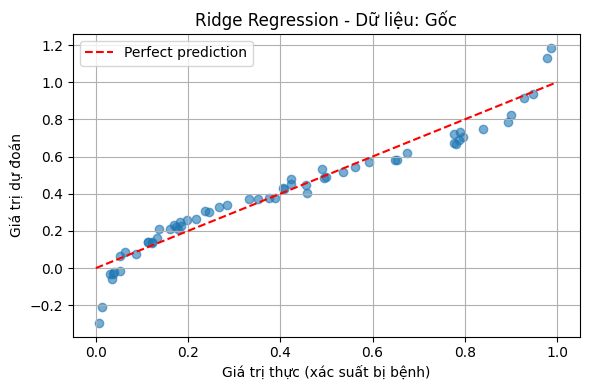


➡️  Tỉ lệ train:test = 7:3 (70:30)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0072
✅ R² Score: 0.9124


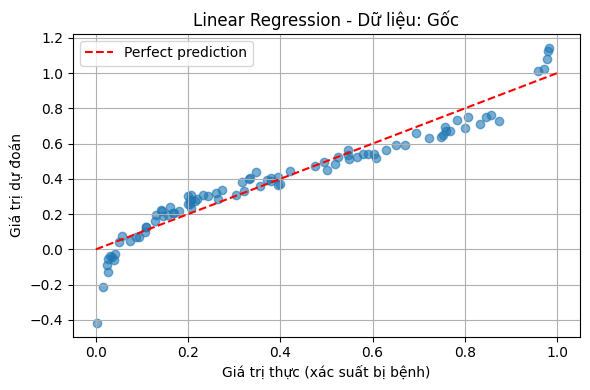


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0071
✅ R² Score: 0.9133


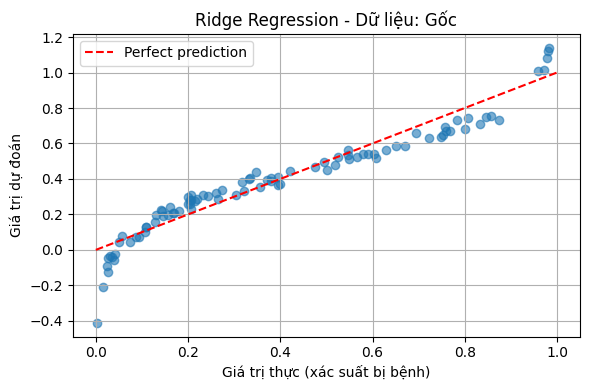


➡️  Tỉ lệ train:test = 6:4 (60:40)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0064
✅ R² Score: 0.9239


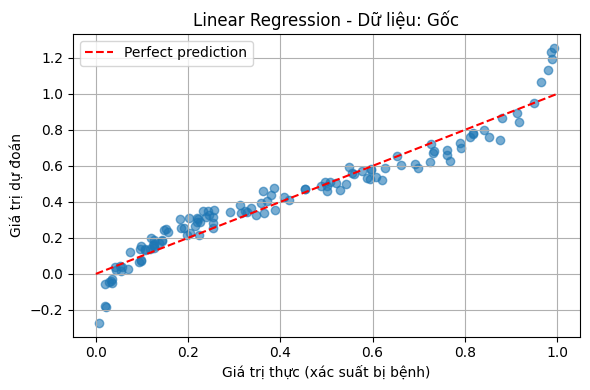


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0063
✅ R² Score: 0.9249


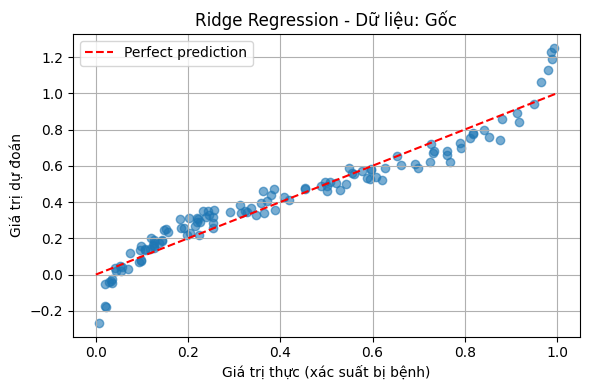


=== Kết quả trên DỮ LIỆU: Giảm chiều PCA ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0023
✅ R² Score: 0.9642

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều PCA', mô hình 'Linear Regression':
   - MSE hiện tại: 0.0023, R² hiện tại: 0.9642
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0063, R² tham chiếu: 0.9298
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


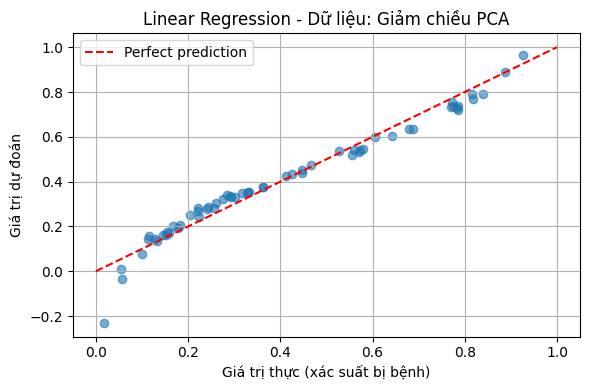


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0023
✅ R² Score: 0.9642

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều PCA', mô hình 'Ridge Regression':
   - MSE hiện tại: 0.0023, R² hiện tại: 0.9642
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0062, R² tham chiếu: 0.9305
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


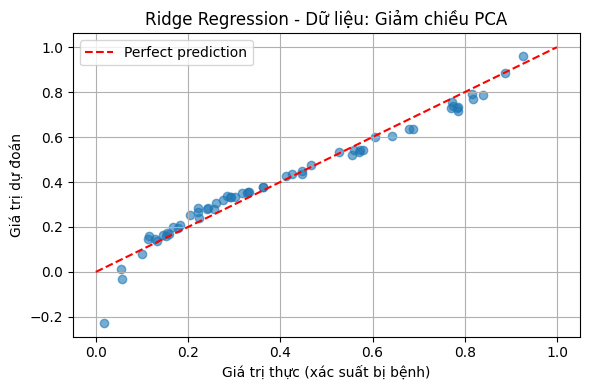


➡️  Tỉ lệ train:test = 7:3 (70:30)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0035
✅ R² Score: 0.9445

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều PCA', mô hình 'Linear Regression':
   - MSE hiện tại: 0.0035, R² hiện tại: 0.9445
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0072, R² tham chiếu: 0.9124
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


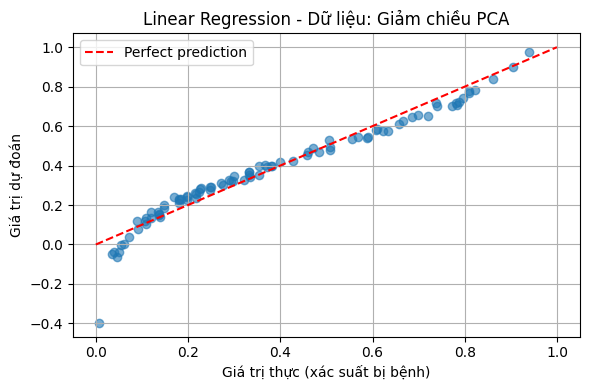


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0035
✅ R² Score: 0.9449

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều PCA', mô hình 'Ridge Regression':
   - MSE hiện tại: 0.0035, R² hiện tại: 0.9449
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0071, R² tham chiếu: 0.9133
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


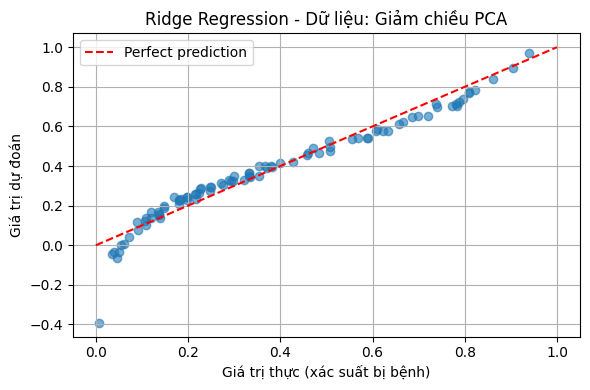


➡️  Tỉ lệ train:test = 6:4 (60:40)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0023
✅ R² Score: 0.9613

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều PCA', mô hình 'Linear Regression':
   - MSE hiện tại: 0.0023, R² hiện tại: 0.9613
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0064, R² tham chiếu: 0.9239
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


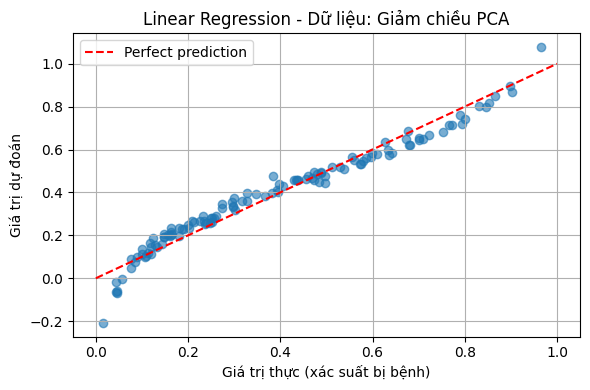


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0023
✅ R² Score: 0.9609

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều PCA', mô hình 'Ridge Regression':
   - MSE hiện tại: 0.0023, R² hiện tại: 0.9609
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0063, R² tham chiếu: 0.9249
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


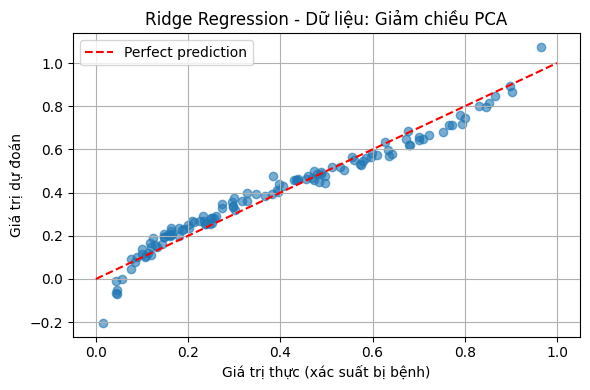


=== Kết quả trên DỮ LIỆU: Giảm chiều LDA ===


➡️  Tỉ lệ train:test = 4:1 (80:20)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0048
✅ R² Score: 0.9411

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều LDA', mô hình 'Linear Regression':
   - MSE hiện tại: 0.0048, R² hiện tại: 0.9411
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0063, R² tham chiếu: 0.9298
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


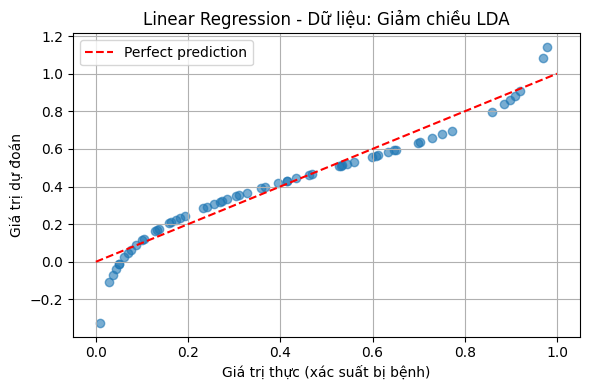


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0047
✅ R² Score: 0.9414

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều LDA', mô hình 'Ridge Regression':
   - MSE hiện tại: 0.0047, R² hiện tại: 0.9414
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0062, R² tham chiếu: 0.9305
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


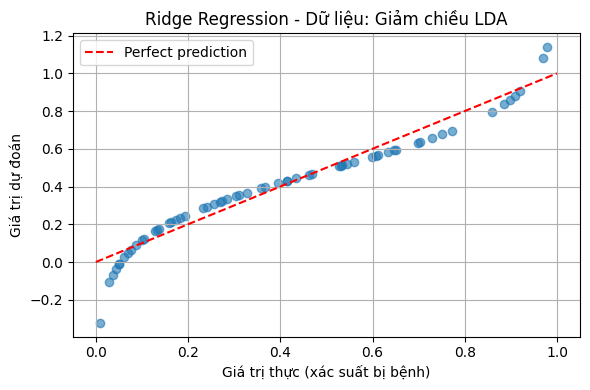


➡️  Tỉ lệ train:test = 7:3 (70:30)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0036
✅ R² Score: 0.9509

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều LDA', mô hình 'Linear Regression':
   - MSE hiện tại: 0.0036, R² hiện tại: 0.9509
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0072, R² tham chiếu: 0.9124
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


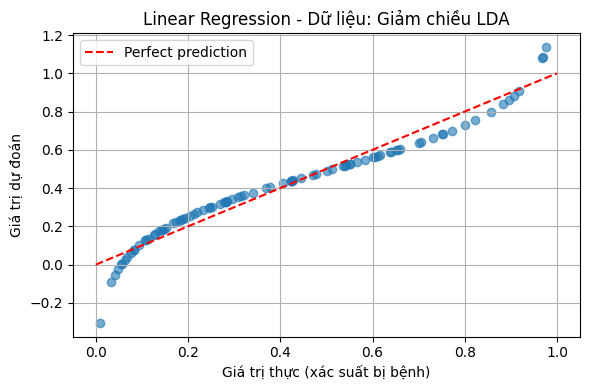


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0036
✅ R² Score: 0.9510

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều LDA', mô hình 'Ridge Regression':
   - MSE hiện tại: 0.0036, R² hiện tại: 0.9510
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0071, R² tham chiếu: 0.9133
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


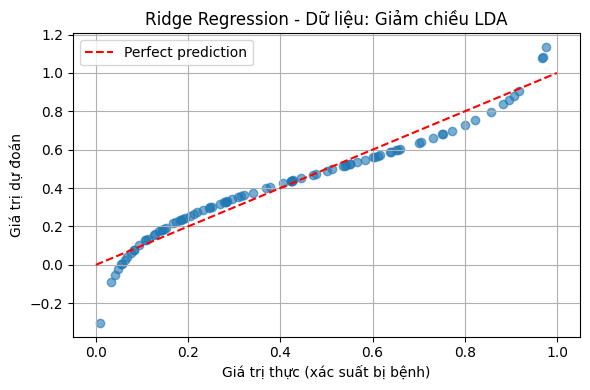


➡️  Tỉ lệ train:test = 6:4 (60:40)

▶️ Hồi quy bằng: Linear Regression
✅ MSE (Mean Squared Error): 0.0041
✅ R² Score: 0.9471

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều LDA', mô hình 'Linear Regression':
   - MSE hiện tại: 0.0041, R² hiện tại: 0.9471
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0064, R² tham chiếu: 0.9239
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


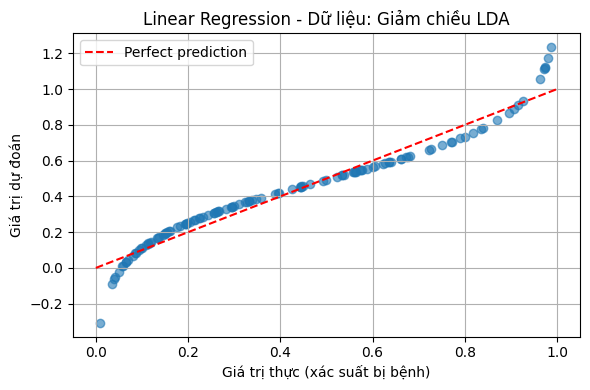


▶️ Hồi quy bằng: Ridge Regression
✅ MSE (Mean Squared Error): 0.0041
✅ R² Score: 0.9475

👉 Phân tích kết quả cho dữ liệu 'Giảm chiều LDA', mô hình 'Ridge Regression':
   - MSE hiện tại: 0.0041, R² hiện tại: 0.9475
   - MSE tham chiếu (dữ liệu nguyên bản): 0.0063, R² tham chiếu: 0.9249
   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).
      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.


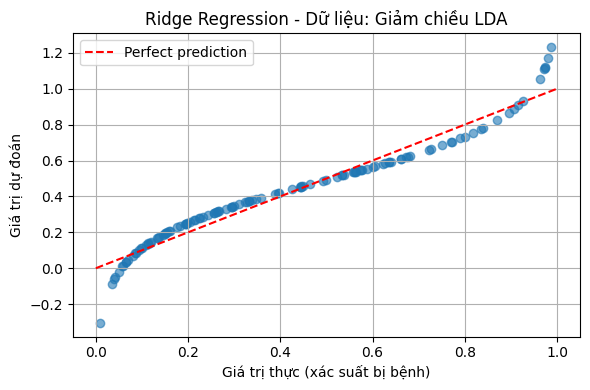

In [31]:
print("\n\n===== CHUYỂN BÀI TOÁN PHÂN LOẠI → HỒI QUY (theo xác suất bị bệnh) =====")

# Mô hình hồi quy sẽ dùng
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0)
}

# Tiêu chuẩn đánh giá
def explain_result(mse, r2, mse_ref, r2_ref, data_label, model_name):
    print(f"\n👉 Phân tích kết quả cho dữ liệu '{data_label}', mô hình '{model_name}':")
    print(f"   - MSE hiện tại: {mse:.4f}, R² hiện tại: {r2:.4f}")
    print(f"   - MSE tham chiếu (dữ liệu nguyên bản): {mse_ref:.4f}, R² tham chiếu: {r2_ref:.4f}")

    if mse < mse_ref and r2 > r2_ref:
        print("   => Mô hình hồi quy trên dữ liệu giảm chiều cho kết quả tốt hơn (MSE giảm, R² tăng).")
        print("      Điều này có thể do giảm chiều giúp loại bỏ nhiễu và giữ lại đặc trưng quan trọng.")
    elif mse > mse_ref and r2 < r2_ref:
        print("   => Kết quả tệ hơn trên dữ liệu giảm chiều (MSE tăng, R² giảm).")
        print("      Có thể do mất thông tin quan trọng khi giảm chiều dẫn đến dự đoán kém chính xác hơn.")
    else:
        print("   => Kết quả có sự thay đổi không rõ ràng giữa dữ liệu nguyên bản và giảm chiều.")
        print("      Điều này có thể do đặc điểm dữ liệu hoặc tỉ lệ train:test ảnh hưởng đến hiệu quả mô hình.")

reference_metrics = {}

# Thực hiện mô hình
for data_label, X in datasets.items():
    print(f"\n=== Kết quả trên DỮ LIỆU: {data_label} ===\n")
    for ratio, label in zip(ratios, ratio_labels):
        print(f"\n➡️  Tỉ lệ train:test = {label}")
        # Chia dữ liệu
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=ratio, random_state=42
        )

        # Huấn luyện Logistic Regression để lấy xác suất
        clf = LogisticRegression(max_iter=1000, solver='lbfgs')
        clf.fit(X_train, y_train)

        # Lấy xác suất dự đoán lớp "Bị" (label = 1)
        y_train_score = clf.predict_proba(X_train)[:, 1]
        y_test_score = clf.predict_proba(X_test)[:, 1]

        for model_name, model in reg_models.items():
            print(f"\n▶️ Hồi quy bằng: {model_name}")

            # Huấn luyện hồi quy
            model.fit(X_train, y_train_score)
            y_pred_score = model.predict(X_test)

            # Đánh giá
            mse = mean_squared_error(y_test_score, y_pred_score)
            r2 = r2_score(y_test_score, y_pred_score)

            print(f"✅ MSE (Mean Squared Error): {mse:.4f}")
            print(f"✅ R² Score: {r2:.4f}")

            # Nếu là dữ liệu nguyên bản, lưu làm tham chiếu
            if data_label == 'Gốc':
                reference_metrics[(label, model_name)] = (mse, r2)
            else:
                # Dữ liệu giảm chiều => lấy tham chiếu để so sánh
                mse_ref, r2_ref = reference_metrics.get((label, model_name), (None, None))
                if mse_ref is not None:
                    explain_result(mse, r2, mse_ref, r2_ref, data_label, model_name)

            # Vẽ biểu đồ so sánh giá trị thật vs dự đoán
            plt.figure(figsize=(6, 4))
            plt.scatter(y_test_score, y_pred_score, alpha=0.6)
            plt.plot([0, 1], [0, 1], 'r--', label='Perfect prediction')
            plt.title(f'{model_name} - Dữ liệu: {data_label}')
            plt.xlabel('Giá trị thực (xác suất bị bệnh)')
            plt.ylabel('Giá trị dự đoán')
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()